# PISA 2012
## by Jean-Pierre Distler


PISA is a global survey that examins how well 15 year old students are prepared for life after school. The survey is taken every three years. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')


For my analysis i want to have a look at how the gender impacts a students score.

In [2]:
df = pd.read_csv('pisa2012.csv', encoding='latin1', index_col=0, low_memory=False)

In [3]:
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


## Data Cleaning
The original dataset contains 634 features most of them are not of interest for my analysis, so i keep only some features of interest and will also change the column names to something more meaningful.

The featiures i'll keep are:
* **Country**
* **StudenId**
* **InternationlGrade:** The class level of the student
* **BirthMonth**
* **BirthYear**
* **Gender**
* **Age**
* **MathScore, ReadingScore and ScienceScore:** The scores have a range from 0 to 1000.

In [4]:
columns = {
    'CNT': 'Country',
    'STIDSTD': 'StudentId',
    'ST01Q01': 'InternationalGrade',
    'ST03Q01': 'BirthMonth',
    'ST03Q02': 'BirthYear',
    'ST04Q01': 'Gender',
    'AGE': 'Age',
    'PV1MATH': 'MathScore',
    'PV1READ': 'ReadingScore',
    'PV1SCIE': 'ScienceScore'
}
df_clean = df.rename(columns=columns)


In [5]:
df_clean = df_clean[list(columns.values())]

In [6]:
df_clean.head()

,Country,StudentId,InternationalGrade,BirthMonth,BirthYear,Gender,Age,MathScore,ReadingScore,ScienceScore
1,Albania,1,10,2,1996,Female,16.17,406.8469,249.5762,341.7009
2,Albania,2,10,2,1996,Female,16.17,486.1427,406.2936,548.9929
3,Albania,3,9,9,1996,Female,15.58,533.2684,401.2100,499.6643
4,Albania,4,9,8,1996,Female,15.67,412.2215,547.3630,438.6796
5,Albania,5,9,10,1996,Female,15.50,381.9209,311.7707,361.5628


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 10 columns):
Country               485490 non-null object
StudentId             485490 non-null int64
InternationalGrade    485490 non-null int64
BirthMonth            485490 non-null int64
BirthYear             485490 non-null int64
Gender                485490 non-null object
Age                   485374 non-null float64
MathScore             485490 non-null float64
ReadingScore          485490 non-null float64
ScienceScore          485490 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 40.7+ MB


Clean null values. I will fill missing Age values with the mean.

In [8]:
df_clean.Age = df_clean[['Age']].fillna(df_clean.Age.mean())

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 10 columns):
Country               485490 non-null object
StudentId             485490 non-null int64
InternationalGrade    485490 non-null int64
BirthMonth            485490 non-null int64
BirthYear             485490 non-null int64
Gender                485490 non-null object
Age                   485490 non-null float64
MathScore             485490 non-null float64
ReadingScore          485490 non-null float64
ScienceScore          485490 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 40.7+ MB


In [10]:
df_clean.describe()

,StudentId,InternationalGrade,BirthMonth,BirthYear,Age,MathScore,ReadingScore,ScienceScore
count,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,6134.066201,9.813323,6.558512,1996.070061,15.784283,469.621653,472.004640,475.769824
std,6733.144944,3.734726,3.705244,0.255250,0.290186,103.265391,102.505523,101.464426
min,1.000000,7.000000,1.000000,1996.000000,15.170000,19.792800,0.083400,2.648300
25%,1811.000000,9.000000,4.000000,1996.000000,15.580000,395.318600,403.600700,404.457300
50%,3740.000000,10.000000,7.000000,1996.000000,15.750000,466.201900,475.455000,475.699400
75%,7456.000000,10.000000,9.000000,1996.000000,16.000000,541.057800,544.502500,547.780700
max,33806.000000,96.000000,99.000000,1997.000000,16.330000,962.229300,904.802600,903.338300


In [11]:
# Save the prepared dataset for later use.
df_clean.to_csv('pisa2012_clean.csv')

In [12]:
df_clean = pd.read_csv('pisa2012_clean.csv')

### What is the structure of your dataset?


The dataset contains 485490 students and 10 features. Country and Gender are categorical variables.

### What is/are the main feature(s) of interest in your dataset?

For my analysis gender and the three score variables are the ones of most interest.


## Univariate Exploration


### Figure 1:
First i want to have a look at the gender distribution

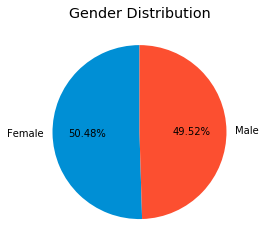

In [13]:
values = df_clean.Gender.value_counts()
plt.pie(values, labels= values.index, startangle=90, autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show();

The distribution is almost even with a bit more femal students. 

### Figure 2:
Next i'll have a look at the distribution of the different scores.

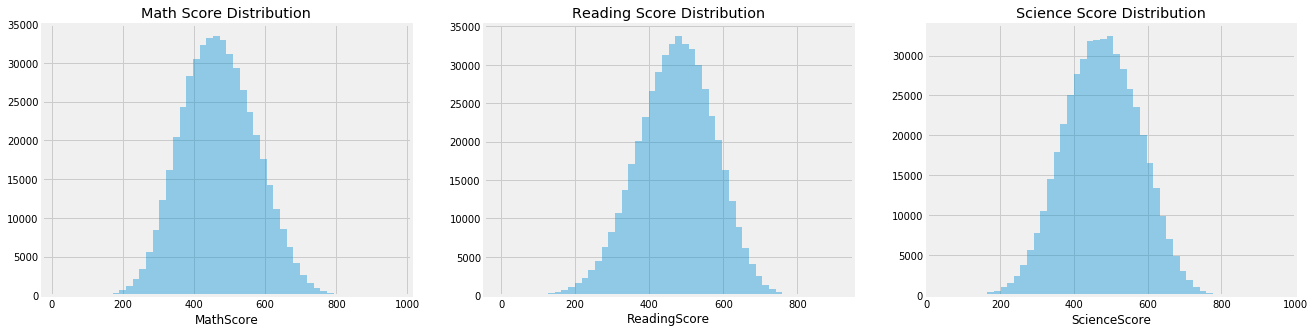

In [14]:
fig, ax = plt.subplots(figsize=(20,5), ncols=3, nrows=1)
plt.xlim(0, 1000)

sns.distplot(df_clean.MathScore, ax=ax[0], kde=False).set_title('Math Score Distribution')
sns.distplot(df_clean.ReadingScore, ax=ax[1], kde=False).set_title('Reading Score Distribution')
sns.distplot(df_clean.ScienceScore, ax=ax[2], kde=False).set_title('Science Score Distribution');



All three scores look normally distributes and most values are around 300 and 600 points.

### Figure 3:
Just for interest i'll check how many students participated the survey per country

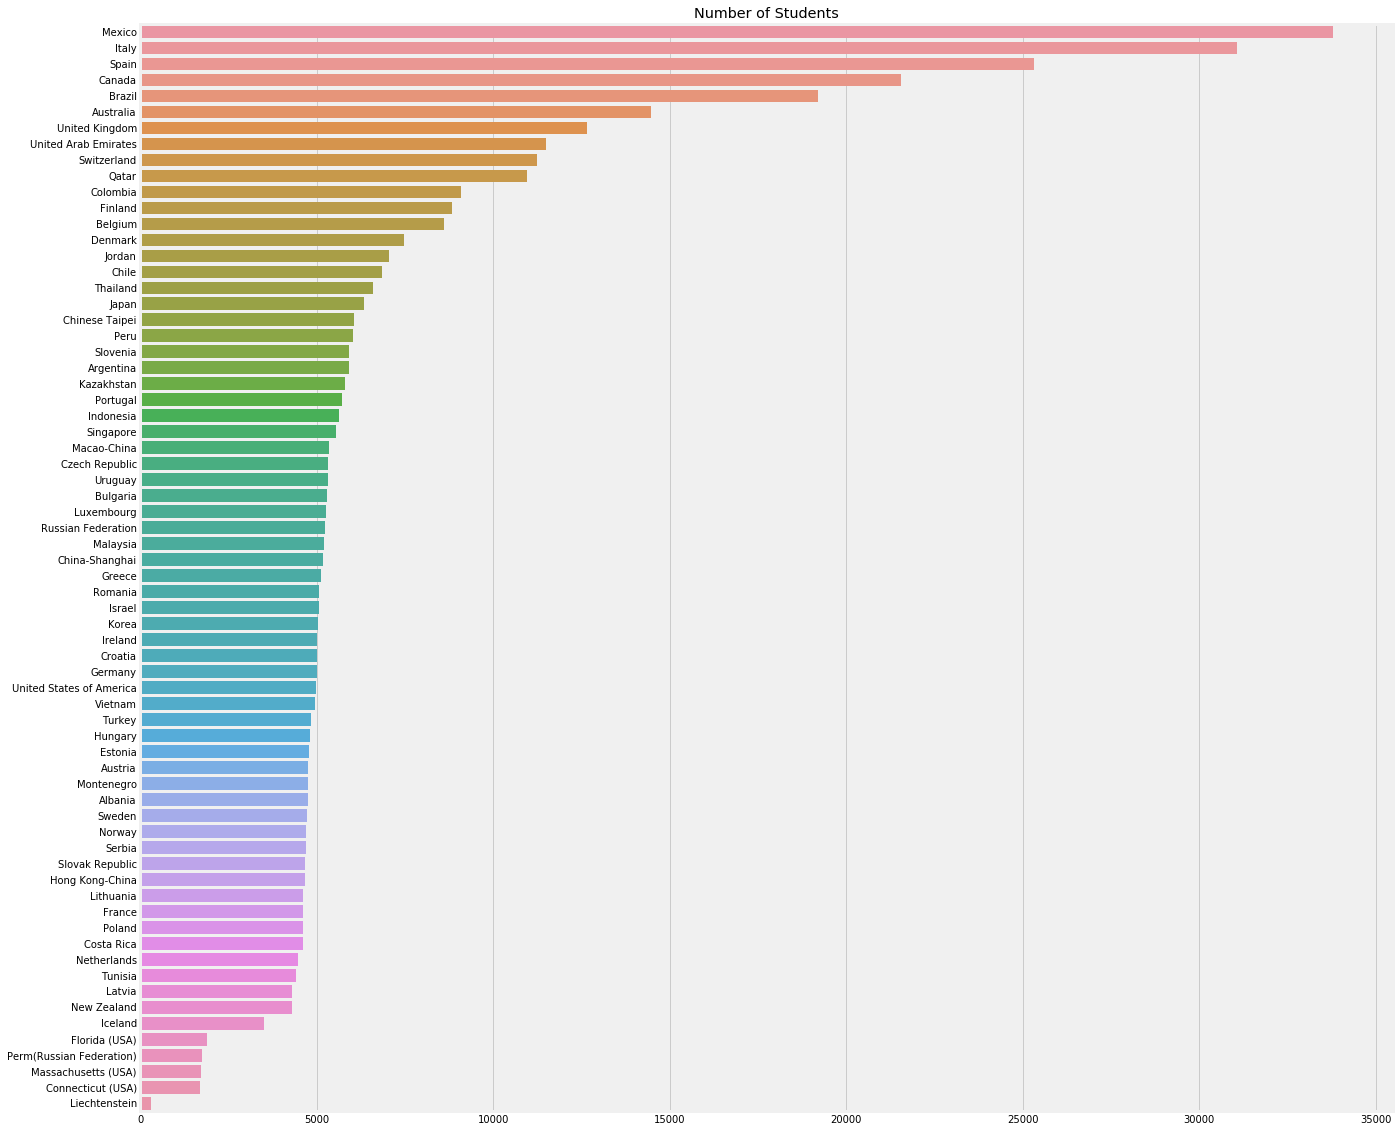

In [15]:
plt.figure(figsize=[20,20])
students_count = df_clean.Country.value_counts().sort_values(ascending=False)
sns.barplot(students_count.values, students_count.index).set_title('Number of Students');


### Figure 4:

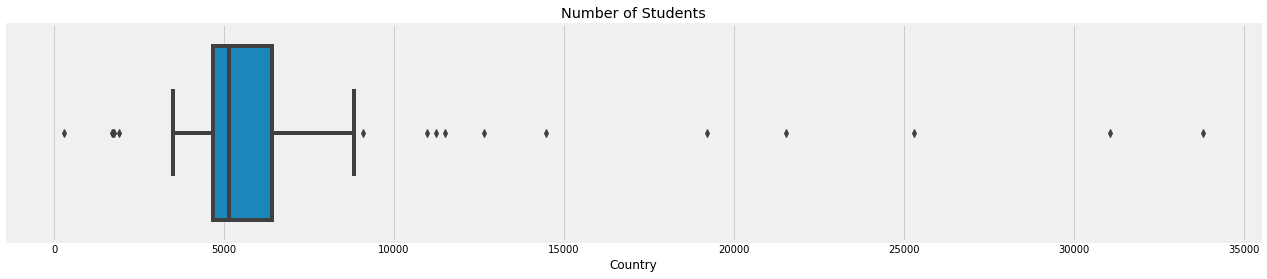

In [16]:
plt.figure(figsize=[20,4])
sns.boxplot(df_clean.Country.value_counts())
plt.title('Number of Students');

In [17]:
students_count

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay                      5315
Bulgaria      

Figure 4 confirms the visible trend one could see in Figure 3. For most countries about 5000 students took the survey. The most extreme outliers are *Liechtenstein* with 283 students and *Mexico* with 33806 students.

## Bivariate Exploration

### Figure 5:
Gender per country.

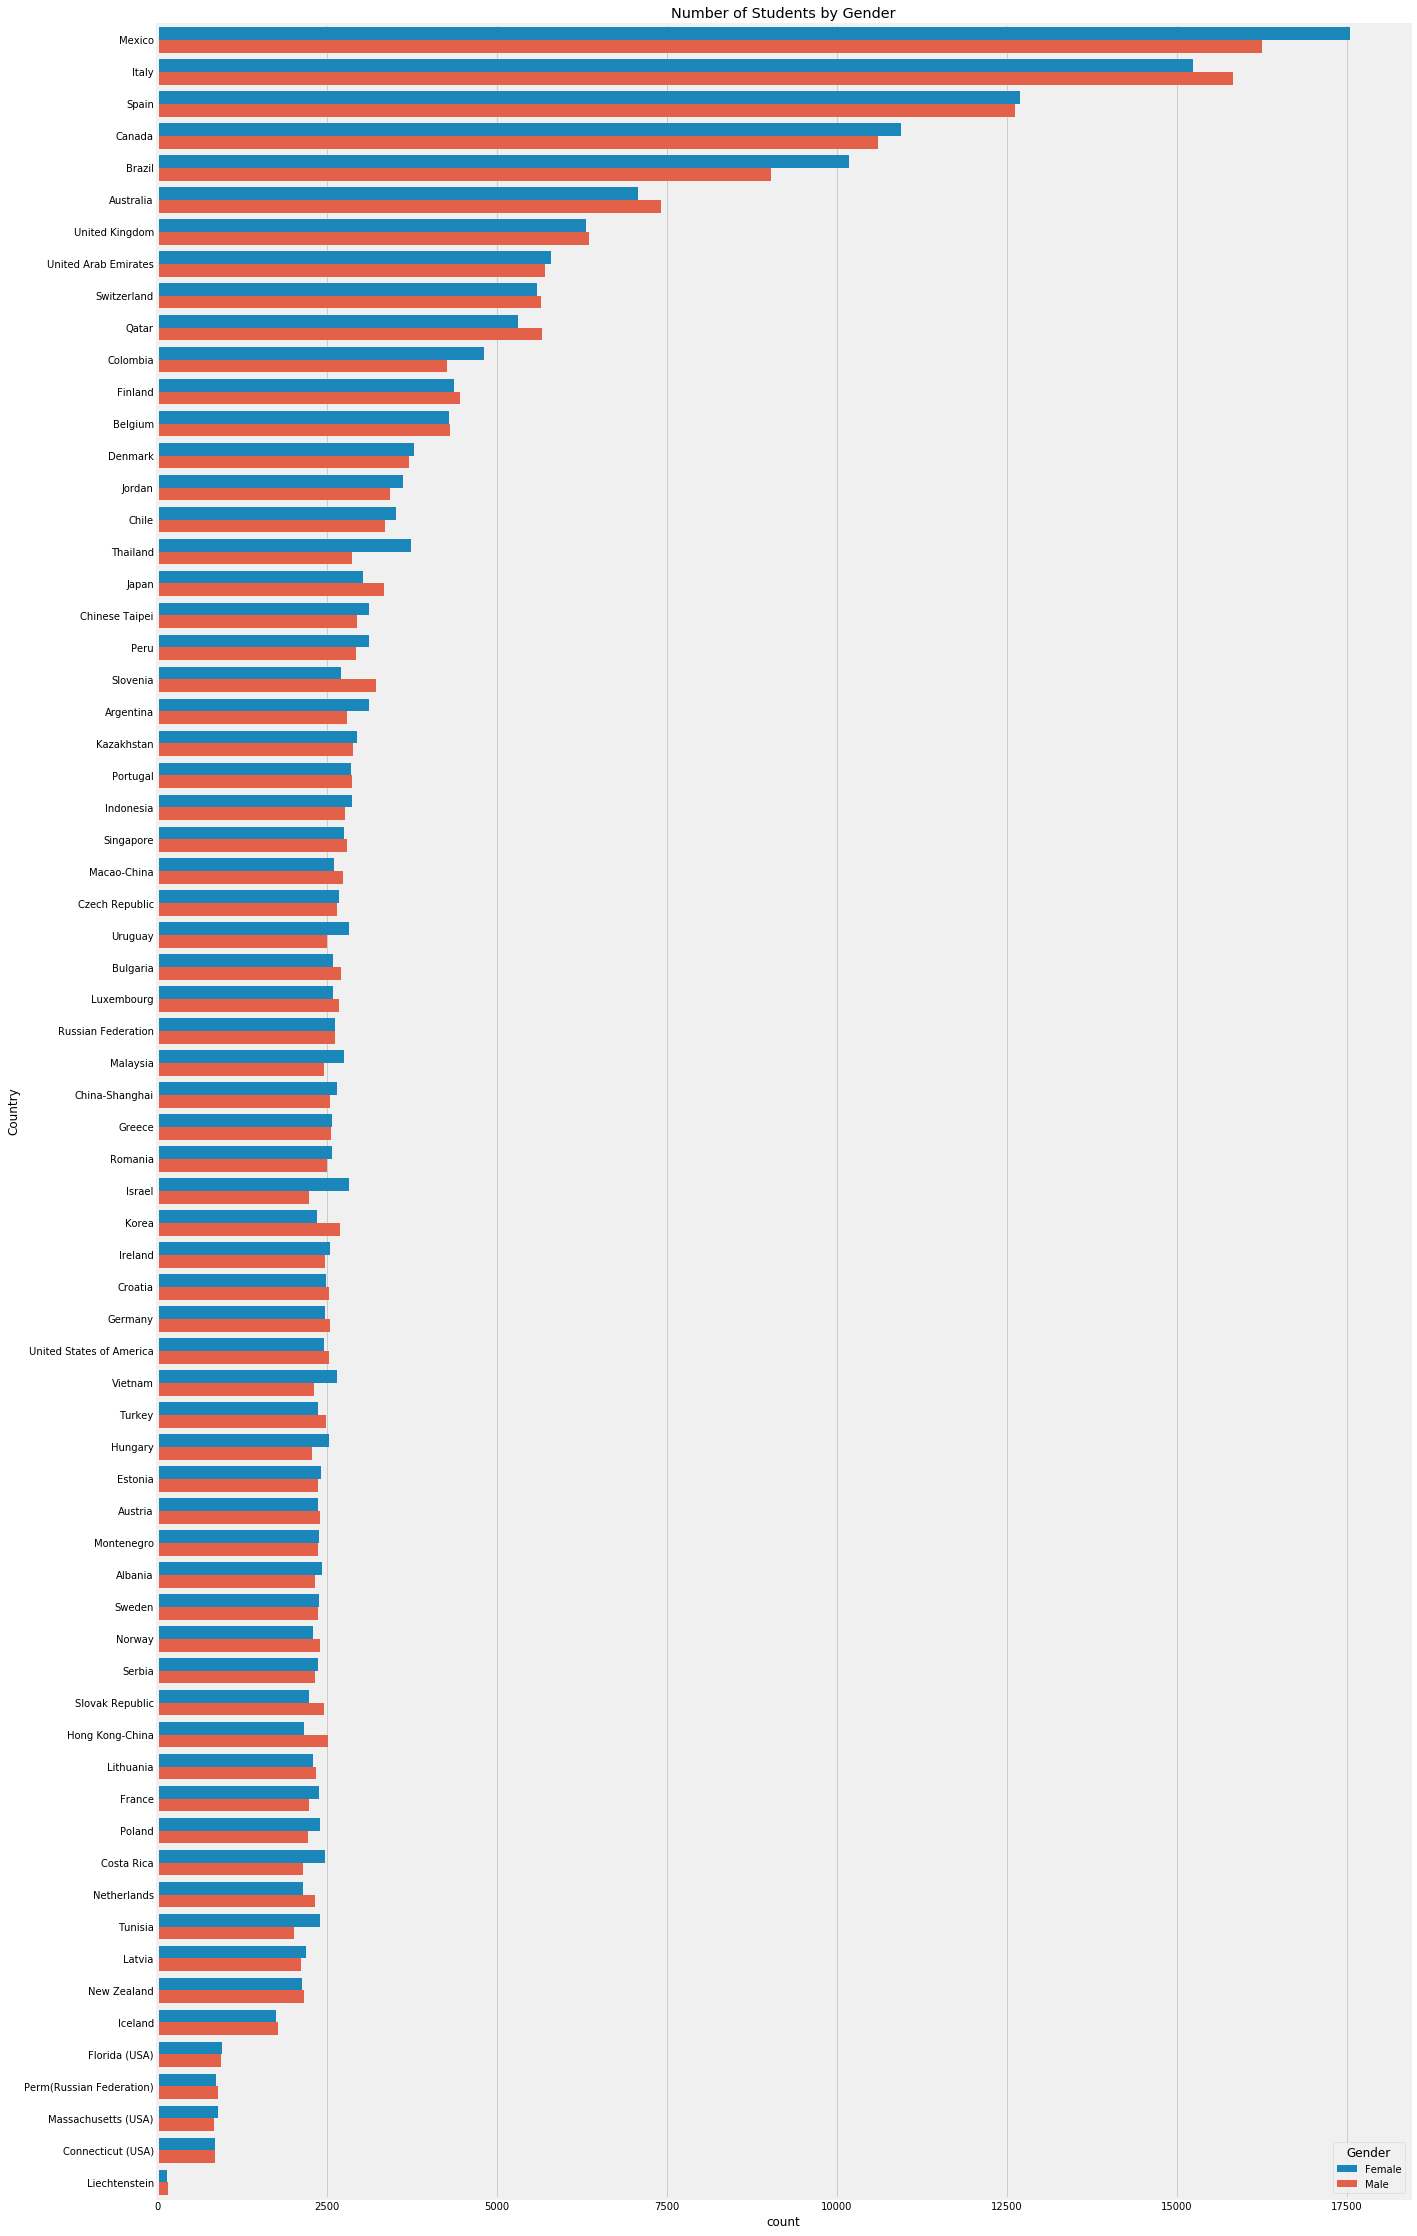

In [18]:
plt.figure(figsize=[20,40])
sns.countplot(data=df_clean, y='Country', order=students_count.index, hue='Gender').set_title('Number of Students by Gender');


Most of the countries have a 50/50 gender distribution, but some like *Mexico* and *Italy* show an unbalanced distribution.

### Figure 6:

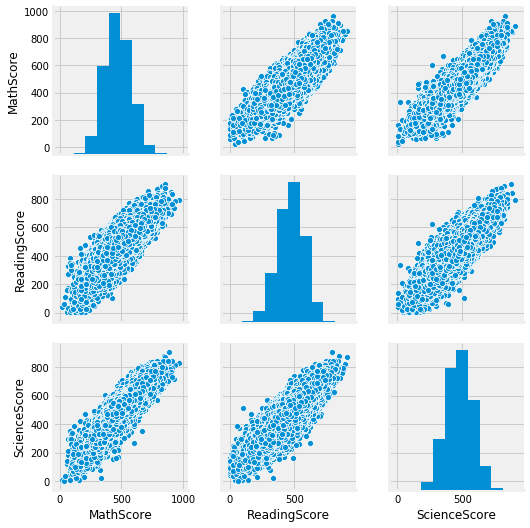

In [19]:
sns.pairplot(data=df_clean, vars=['MathScore', 'ReadingScore', 'ScienceScore']);

The pairplot shows that there is a positive correlation between the different scores. So it is unlikely that there are students that perform well in only one subject. 

In [20]:
df_male = df_clean[df_clean['Gender'] == 'Male']
df_female = df_clean[df_clean['Gender'] == 'Female']

In [21]:
df_male.describe()

,Unnamed: 0,StudentId,InternationalGrade,BirthMonth,BirthYear,Age,MathScore,ReadingScore,ScienceScore
count,240426.000000,240426.000000,240426.000000,240426.000000,240426.000000,240426.000000,240426.000000,240426.000000,240426.000000
mean,242791.738019,6153.358780,9.821267,6.549999,1996.069186,15.785047,475.317572,453.966386,476.215567
std,139782.984283,6787.831308,4.260150,3.667351,0.253770,0.289944,106.071792,105.252145,105.287730
min,8.000000,1.000000,7.000000,1.000000,1996.000000,15.250000,34.748400,0.083400,2.648300
25%,122236.500000,1791.000000,9.000000,4.000000,1996.000000,15.580000,399.057500,382.509500,401.659800
50%,243518.500000,3728.000000,10.000000,7.000000,1996.000000,15.750000,472.199700,457.010200,476.352100
75%,364016.250000,7482.000000,10.000000,9.000000,1996.000000,16.000000,549.392400,529.024900,551.790400
max,485489.000000,33801.000000,96.000000,99.000000,1997.000000,16.330000,962.229300,889.258700,903.338300


In [22]:
df_female.describe()

,Unnamed: 0,StudentId,InternationalGrade,BirthMonth,BirthYear,Age,MathScore,ReadingScore,ScienceScore
count,245064.000000,245064.000000,245064.000000,245064.000000,245064.000000,245064.000000,245064.000000,245064.000000,245064.000000
mean,242700.137066,6115.138747,9.805528,6.566864,1996.070920,15.783534,464.033534,489.701508,475.332517
std,140507.502483,6679.018142,3.134791,3.742035,0.256692,0.290422,100.121737,96.515234,97.566233
min,1.000000,1.000000,7.000000,1.000000,1996.000000,15.170000,19.792800,0.083400,6.844500
25%,120551.750000,1830.000000,9.000000,4.000000,1996.000000,15.500000,392.124900,425.039300,407.254800
50%,241888.500000,3753.000000,10.000000,7.000000,1996.000000,15.750000,460.983000,491.999600,475.326400
75%,364219.250000,7423.000000,10.000000,9.000000,1996.000000,16.000000,533.034700,557.212500,544.050700
max,485490.000000,33806.000000,96.000000,99.000000,1997.000000,16.330000,912.299400,904.802600,871.727000


### Figure 6:
Male Score Difference

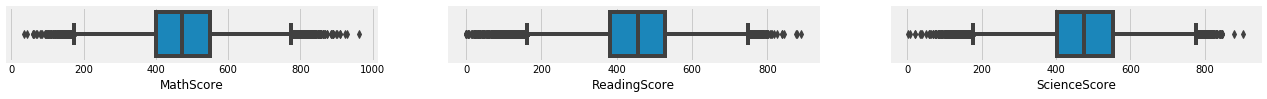

In [23]:
fig, ax = plt.subplots(figsize=(20,1), ncols=3, nrows=1)
plt.xlim(0, 1000)
plt.subplot(1,3,1)
sns.boxplot(data=df_male, x='MathScore')
plt.subplot(1,3,2)
sns.boxplot(data=df_male, x='ReadingScore')
plt.subplot(1,3,3)
sns.boxplot(data=df_male, x='ScienceScore');

### Figure 7:
Female Score Difference

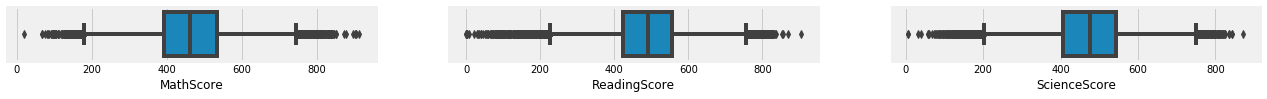

In [24]:
fig, ax = plt.subplots(figsize=(20,1), ncols=3, nrows=1)
plt.xlim(0, 1000)
plt.subplot(1,3,1)
sns.boxplot(data=df_female, x='MathScore')
plt.subplot(1,3,2)
sns.boxplot(data=df_female, x='ReadingScore')
plt.subplot(1,3,3)
sns.boxplot(data=df_female, x='ScienceScore');

Figure 6 and 7 show that male students perform a bit better in Math and female students in Reading. For science both perform more or less equal.

## Multivariate Exploration

in this section i'll look at the different scores for each country. 

In [25]:
def draw_gender_score(column):
    country=df_clean['Country'].unique().tolist()
    country.sort()
    sns.set(font_scale=1)
    g=sns.FacetGrid(data=df_clean, col='Country', hue='Gender', col_wrap=4)
    g.map(sns.kdeplot, column)

    for ax, c in zip(g.axes.flat, country):
        ax.legend()

### Figure 8:
**Math Score by Gender**

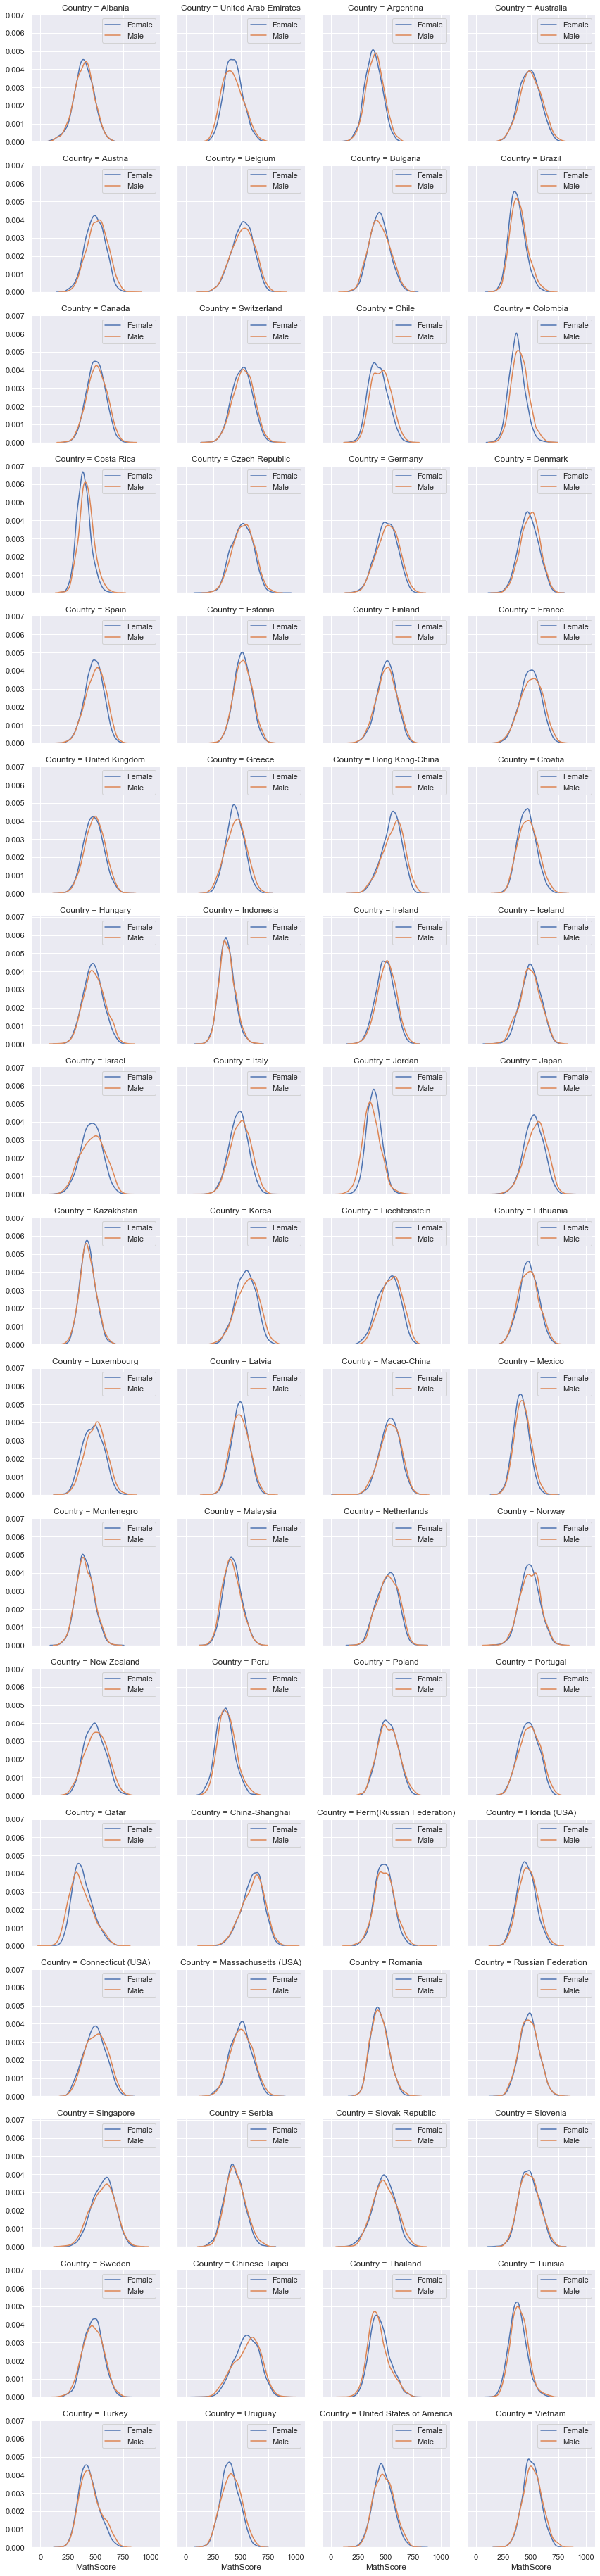

In [26]:
draw_gender_score('MathScore')

In most countries the male students achieve higher scores in Math.

### Figure 9:
**Reading Score by Gender**

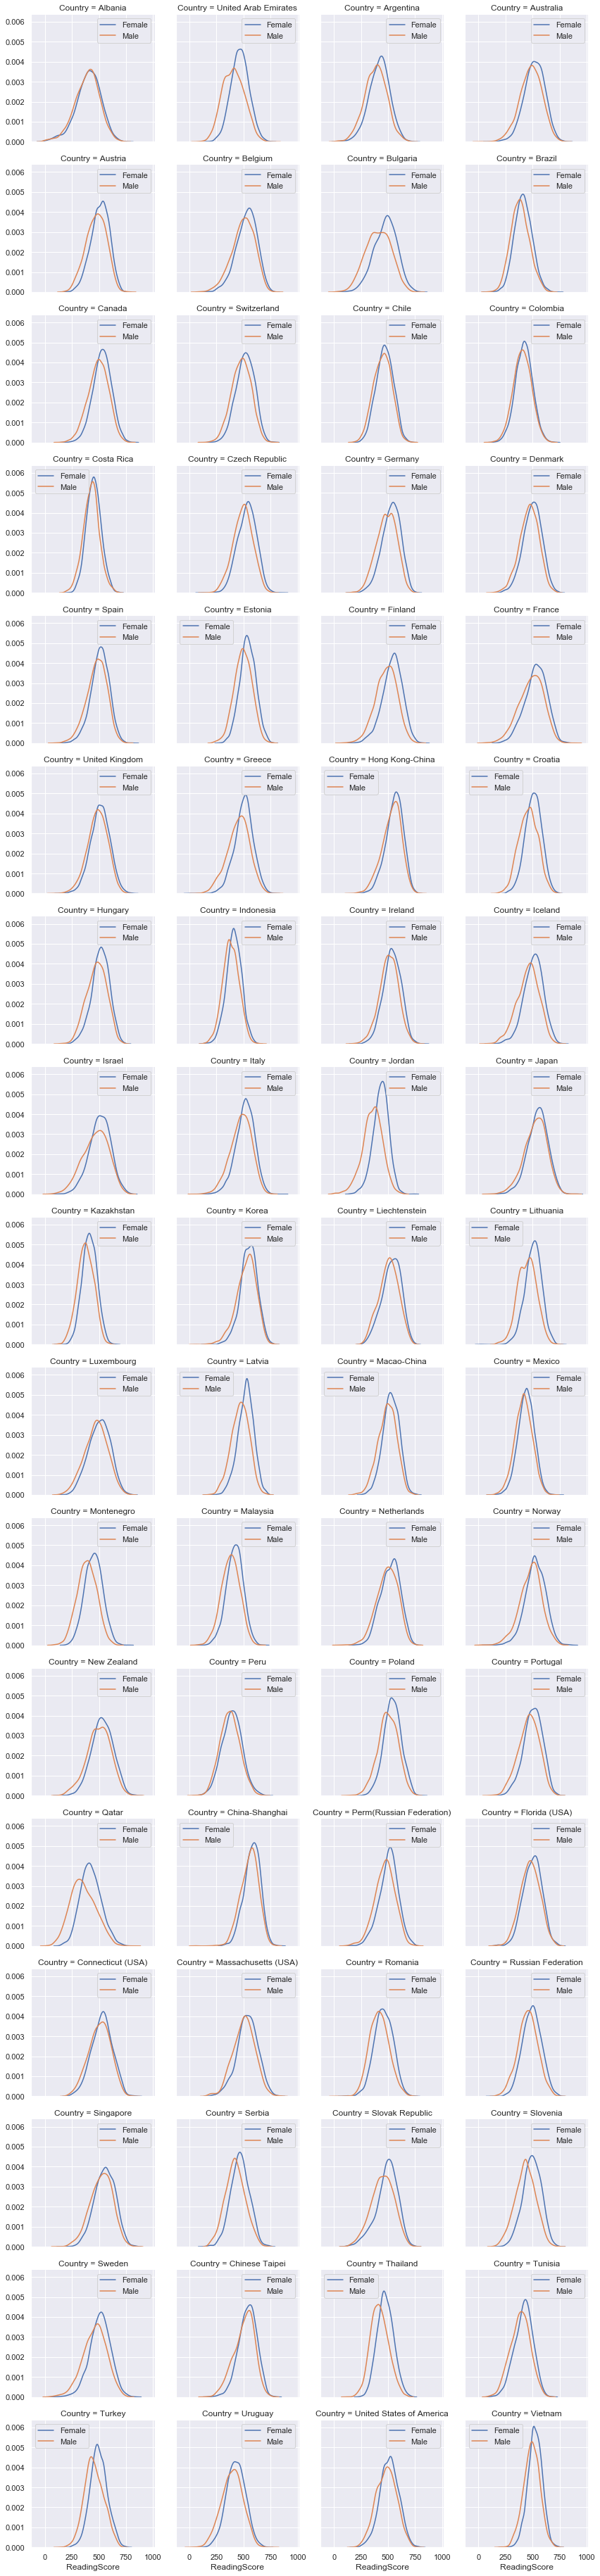

In [27]:
draw_gender_score('ReadingScore')

As we saw earlier female students have a higher reading score than male. Interestingly this seems to be true for all countries.

### Figure 10:
**Science Score by Gender**

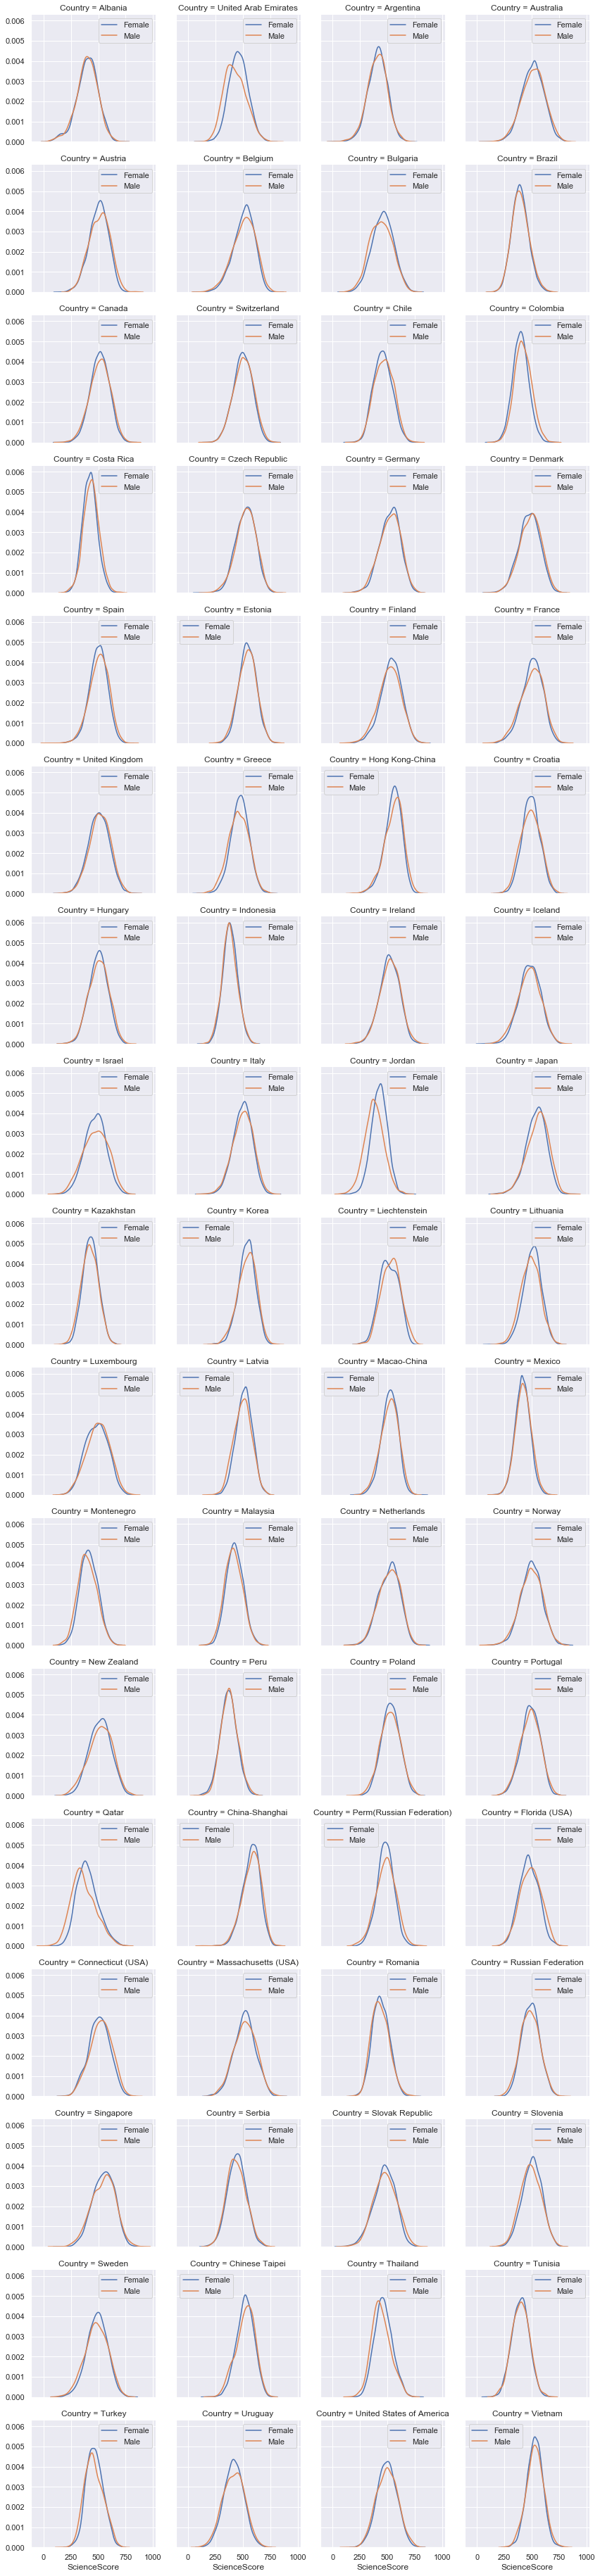

In [28]:
draw_gender_score('ScienceScore')

The science score is almost euqal for many countries. 